In [54]:
#Importing the Necessary packages
import numpy as np
from keras import Sequential
from keras.layers import Dense
from keras import Model
from keras.utils import to_categorical
from keras.layers import Activation
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau,CSVLogger, EarlyStopping, ModelCheckpoint
import pandas as pd
%matplotlib inline
import pylab
from keras import optimizers

In [9]:
#Downloading the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
#Saving the dataset in local system
np.save("x_train_out.npy",x_train)
np.save("y_train_out.npy",y_train)
np.save("x_test_out.npy",x_test)
np.save("y_test_out.npy",y_test)

In [11]:
#Loading the dataset.
x_train = np.load('x_train_out.npy')
y_train = np.load('y_train_out.npy')
x_test = np.load('x_test_out.npy')
y_test = np.load('y_test_out.npy')

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
#Defining number of pixels and Number of classes 
NUM_PIXELS = x_train.shape[1] * x_train.shape[2]
NUM_CLASSES = 10

In [15]:
#Converting the data into a form of 1D vector.
x_train = x_train.reshape(x_train.shape[0], NUM_PIXELS).astype('float32')
x_test = x_test.reshape(x_test.shape[0], NUM_PIXELS).astype('float32')

In [16]:
#Normalising Data based on the mean and the standard deviation of the training data.
mean = np.mean(x_train)
std = np.std(x_train)
x_train_normalised = (x_train-mean)/(std+1e-7)
x_test_normalised = (x_test-mean)/(std+1e-7)

In [17]:
training_count = (int)(0.8 * x_train.shape[0])

In [18]:
training_count

48000

In [19]:
#Splitting the training data into normal training data and validation (Normalised Data)
x_validation_normalised = x_train_normalised[training_count:]
y_validation = y_train[training_count:]
x_train_normalised = x_train_normalised[0:training_count]
y_train = y_train[0:training_count]

In [20]:
x_validation_normalised.shape

(12000, 784)

In [21]:
x_train_normalised.shape

(48000, 784)

In [22]:
#Splitting the training data into normal training data and validation (Not Normalised Data)
x_validation = x_train[training_count:]
x_train = x_train[0:training_count]

In [23]:
x_validation.shape

(12000, 784)

In [24]:
x_train.shape

(48000, 784)

In [25]:
#One hot encoding the labels
y_train = to_categorical(y_train, 10)
y_validation = to_categorical(y_validation,10)
y_test = to_categorical(y_test, 10)

In [26]:
y_train.shape

(48000, 10)

In [27]:
y_validation.shape

(12000, 10)

In [28]:
y_test.shape

(10000, 10)

In [29]:
#Setting seeds of both Numpy and tensorflow to reproduce the results
from numpy.random import seed
seed(6)
from tensorflow import set_random_seed
set_random_seed(6)

In [30]:
#Model construction
"""
Input Parameters
------------------

number of layers : Number of hidden Layers
no_of_hidden_neurons : List Containing number of neurons in each hidden layer
activation_function : Which activation function to be used in each layer

Output
--------
An instance of the model

"""
def model_constructor(number_of_layers, no_of_hidden_neurons, activation_function) :
    model = Sequential()
    model.add(Dense(no_of_hidden_neurons[0], input_dim = NUM_PIXELS, activation = activation_function))
    for i in range(1,number_of_layers) :
        model.add(Dense(no_of_hidden_neurons[i], activation = activation_function))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    return model

In [31]:
normalised_model = model_constructor(1,[784],"relu")

In [32]:
normalised_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [33]:
model =  model_constructor(1,[784],"relu")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [34]:
normalised_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
csv_logger = CSVLogger('MNIST_normalised_model.csv')
model_checkpoint = ModelCheckpoint('MNIST_model_normalised.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)
csv_logger1 = CSVLogger('MNIST_model.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [50]:
history = normalised_model.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger, model_checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 594us/step - loss: 0.0175 - acc: 0.9948 - val_loss: 0.1343 - val_acc: 0.9772
Epoch 2/10
48000/48000 [==============================] - 29s 595us/step - loss: 0.0226 - acc: 0.9934 - val_loss: 0.1642 - val_acc: 0.9743
Epoch 3/10
48000/48000 [==============================] - 28s 591us/step - loss: 0.0159 - acc: 0.9957 - val_loss: 0.1921 - val_acc: 0.9706
Epoch 4/10
48000/48000 [==============================] - 28s 593us/step - loss: 0.0195 - acc: 0.9945 - val_loss: 0.1478 - val_acc: 0.9776
Epoch 5/10
48000/48000 [==============================] - 29s 599us/step - loss: 0.0165 - acc: 0.9956 - val_loss: 0.1785 - val_acc: 0.9743
Epoch 6/10
48000/48000 [==============================] - 29s 600us/step - loss: 0.0177 - acc: 0.9956 - val_loss: 0.1735 - val_acc: 0.9749
Epoch 7/10
48000/48000 [==============================] - 29s 596us/step - loss: 0.0176 - acc: 0.9952 - val_loss: 0.

In [38]:
history1 = model.fit(x_train, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 596us/step - loss: 14.6609 - acc: 0.0903 - val_loss: 14.6446 - val_acc: 0.0914
Epoch 2/10
48000/48000 [==============================] - 29s 607us/step - loss: 14.6661 - acc: 0.0901 - val_loss: 14.6446 - val_acc: 0.0914
Epoch 3/10
48000/48000 [==============================] - 29s 610us/step - loss: 14.6661 - acc: 0.0901 - val_loss: 14.6446 - val_acc: 0.0914
Epoch 4/10
48000/48000 [==============================] - 29s 614us/step - loss: 14.6661 - acc: 0.0901 - val_loss: 14.6446 - val_acc: 0.0914
Epoch 5/10
48000/48000 [==============================] - 30s 616us/step - loss: 14.6661 - acc: 0.0901 - val_loss: 14.6446 - val_acc: 0.0914
Epoch 6/10
48000/48000 [==============================] - 29s 610us/step - loss: 14.6661 - acc: 0.0901 - val_loss: 14.6446 - val_acc: 0.0914
Epoch 7/10
48000/48000 [==============================] - 29s 610us/step - loss: 14.6661 - acc: 0.0901 -

In [51]:
normalised = pd.read_csv("MNIST_normalised_model.csv")

In [40]:
normal = pd.read_csv('MNIST_model.csv')

In [52]:
normalised

,epoch,acc,loss,val_acc,val_loss
0,0,0.994771,0.017450,0.977250,0.134291
1,1,0.993437,0.022576,0.974333,0.164191
2,2,0.995708,0.015911,0.970583,0.192082
3,3,0.994458,0.019520,0.977583,0.147839
4,4,0.995583,0.016501,0.974333,0.178501
5,5,0.995563,0.017675,0.974917,0.173522
6,6,0.995188,0.017638,0.977833,0.166361
7,7,0.995708,0.015049,0.973083,0.199958
8,8,0.995167,0.019529,0.976667,0.170301
9,9,0.996646,0.011079,0.974833,0.183015


In [42]:
normal

,epoch,acc,loss,val_acc,val_loss
0,0,0.090333,14.660876,0.091417,14.644633
1,1,0.090083,14.666123,0.091417,14.644633
2,2,0.090083,14.666123,0.091417,14.644633
3,3,0.090083,14.666123,0.091417,14.644633
4,4,0.090083,14.666123,0.091417,14.644633
5,5,0.090083,14.666123,0.091417,14.644633
6,6,0.090083,14.666123,0.091417,14.644633
7,7,0.090083,14.666123,0.091417,14.644633
8,8,0.090083,14.666123,0.091417,14.644633
9,9,0.090083,14.666123,0.091417,14.644633


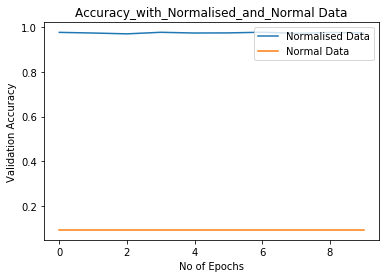

In [53]:
pylab.plot(normalised['epoch'],normalised['val_acc'],label = 'Normalised Data')
pylab.plot(normal['epoch'], normal['val_acc'],label = 'Normal Data')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("No of Epochs")
pylab.ylabel("Validation Accuracy")
plt.title('Accuracy_with_Normalised_and_Normal Data')
pylab.savefig("Accuracy_with_Normalised_and_Normal Data")
pylab.show()

In [68]:
Adam1 = optimizers.Adam(lr = 0.1)
Adam2 = optimizers.Adam(lr = 0.01)
Adam3 = optimizers.Adam(lr = 0.001)
Adam4 = optimizers.Adam(lr = 0.0001)
Adam5 = optimizers.Adam(lr = 0.00001)

In [63]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adam1, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adam1.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adam1.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 607us/step - loss: 14.4698 - acc: 0.1018 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 2/10
48000/48000 [==============================] - 29s 614us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 3/10
48000/48000 [==============================] - 29s 606us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 4/10
48000/48000 [==============================] - 29s 605us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 5/10
48000/48000 [==============================] - 29s 603us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 6/10
48000/48000 [==============================] - 29s 603us/step - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 7/10
48000/48000 [==============================] - 29s 601us/step - loss: 14.4764 - acc: 0.1019 -

In [64]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adam2, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adam2.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adam2.hdf5', monitor = 'val_loss', verbose = 1,
                                    save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 610us/step - loss: 10.1503 - acc: 0.3668 - val_loss: 10.1719 - val_acc: 0.3683
Epoch 2/10
48000/48000 [==============================] - 29s 604us/step - loss: 10.0643 - acc: 0.3751 - val_loss: 9.8833 - val_acc: 0.3866
Epoch 3/10
48000/48000 [==============================] - 29s 607us/step - loss: 10.1345 - acc: 0.3710 - val_loss: 9.9906 - val_acc: 0.3801
Epoch 4/10
48000/48000 [==============================] - 29s 611us/step - loss: 9.7468 - acc: 0.3949 - val_loss: 9.0058 - val_acc: 0.4410
Epoch 5/10
48000/48000 [==============================] - 29s 609us/step - loss: 8.9152 - acc: 0.4466 - val_loss: 8.4405 - val_acc: 0.4763
Epoch 6/10
48000/48000 [==============================] - 29s 604us/step - loss: 8.7885 - acc: 0.4545 - val_loss: 8.4397 - val_acc: 0.4763
Epoch 7/10
48000/48000 [==============================] - 29s 598us/step - loss: 8.9409 - acc: 0.4451 - val_loss

In [69]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adam3.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adam3.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation),
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 611us/step - loss: 0.2083 - acc: 0.9356 - val_loss: 0.1223 - val_acc: 0.9639
Epoch 2/10
48000/48000 [==============================] - 29s 598us/step - loss: 0.0907 - acc: 0.9718 - val_loss: 0.0948 - val_acc: 0.9731
Epoch 3/10
48000/48000 [==============================] - 29s 604us/step - loss: 0.0636 - acc: 0.9797 - val_loss: 0.1072 - val_acc: 0.9705
Epoch 4/10
48000/48000 [==============================] - 29s 600us/step - loss: 0.0510 - acc: 0.9832 - val_loss: 0.1133 - val_acc: 0.9728
Epoch 5/10
48000/48000 [==============================] - 29s 597us/step - loss: 0.0423 - acc: 0.9865 - val_loss: 0.0993 - val_acc: 0.9771
Epoch 6/10
48000/48000 [==============================] - 29s 598us/step - loss: 0.0335 - acc: 0.9891 - val_loss: 0.1089 - val_acc: 0.9760
Epoch 7/10
48000/48000 [==============================] - 29s 596us/step - loss: 0.0308 - acc: 0.9903 - val_loss: 0.

In [65]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adam4, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adam4.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adam4.hdf5', monitor = 'val_loss', 
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 622us/step - loss: 0.2254 - acc: 0.9337 - val_loss: 0.1437 - val_acc: 0.9604
Epoch 2/10
48000/48000 [==============================] - 29s 612us/step - loss: 0.1124 - acc: 0.9683 - val_loss: 0.1151 - val_acc: 0.9667
Epoch 3/10
48000/48000 [==============================] - 30s 616us/step - loss: 0.0796 - acc: 0.9775 - val_loss: 0.0970 - val_acc: 0.9721
Epoch 4/10
48000/48000 [==============================] - 30s 615us/step - loss: 0.0596 - acc: 0.9841 - val_loss: 0.0873 - val_acc: 0.9745
Epoch 5/10
48000/48000 [==============================] - 29s 611us/step - loss: 0.0455 - acc: 0.9878 - val_loss: 0.0873 - val_acc: 0.9742
Epoch 6/10
48000/48000 [==============================] - 29s 605us/step - loss: 0.0349 - acc: 0.9910 - val_loss: 0.0822 - val_acc: 0.9744
Epoch 7/10
48000/48000 [==============================] - 29s 601us/step - loss: 0.0268 - acc: 0.9939 - val_loss: 0.

In [70]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adam5, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adam5.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adam5.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 31s 656us/step - loss: 0.8400 - acc: 0.7688 - val_loss: 0.4029 - val_acc: 0.8963
Epoch 2/10
48000/48000 [==============================] - 28s 577us/step - loss: 0.3577 - acc: 0.9032 - val_loss: 0.2942 - val_acc: 0.9194
Epoch 3/10
48000/48000 [==============================] - 27s 572us/step - loss: 0.2845 - acc: 0.9214 - val_loss: 0.2517 - val_acc: 0.9307
Epoch 4/10
48000/48000 [==============================] - 28s 573us/step - loss: 0.2459 - acc: 0.9320 - val_loss: 0.2247 - val_acc: 0.9376
Epoch 5/10
48000/48000 [==============================] - 27s 569us/step - loss: 0.2198 - acc: 0.9393 - val_loss: 0.2060 - val_acc: 0.9436
Epoch 6/10
48000/48000 [==============================] - 27s 560us/step - loss: 0.1995 - acc: 0.9451 - val_loss: 0.1929 - val_acc: 0.9486
Epoch 7/10
48000/48000 [==============================] - 27s 557us/step - loss: 0.1833 - acc: 0.9500 - val_loss: 0.

In [71]:
lr1 = pd.read_csv('MNIST_model_adam1.csv')
lr1

,epoch,acc,loss,val_acc,val_loss
0,0,0.101792,14.469803,0.1035,14.449872
1,1,0.101854,14.476400,0.1035,14.449872
2,2,0.101854,14.476400,0.1035,14.449872
3,3,0.101854,14.476400,0.1035,14.449872
4,4,0.101854,14.476400,0.1035,14.449872
5,5,0.101854,14.476400,0.1035,14.449872
6,6,0.101854,14.476400,0.1035,14.449872
7,7,0.101854,14.476400,0.1035,14.449872
8,8,0.101854,14.476400,0.1035,14.449872
9,9,0.101854,14.476400,0.1035,14.449872


In [72]:
lr2 = pd.read_csv('MNIST_model_adam2.csv')
lr2

,epoch,acc,loss,val_acc,val_loss
0,0,0.366833,10.150300,0.368333,10.171908
1,1,0.375146,10.064300,0.386583,9.883276
2,2,0.370979,10.134495,0.380083,9.990552
3,3,0.394854,9.746813,0.441000,9.005784
4,4,0.446604,8.915164,0.476250,8.440451
5,5,0.454500,8.788456,0.476250,8.439665
6,6,0.445063,8.940881,0.461250,8.681858
7,7,0.457042,8.748724,0.461083,8.683767
8,8,0.454500,8.790885,0.458250,8.728007
9,9,0.458646,8.724594,0.476833,8.431274


In [73]:
lr3 = pd.read_csv('MNIST_model_adam3.csv')
lr3

,epoch,acc,loss,val_acc,val_loss
0,0,0.935583,0.208253,0.963917,0.122298
1,1,0.971771,0.090732,0.973083,0.094846
2,2,0.979708,0.063607,0.970500,0.107173
3,3,0.983167,0.050993,0.972750,0.113346
4,4,0.986458,0.042338,0.977083,0.099308
5,5,0.989125,0.033496,0.976000,0.108851
6,6,0.990333,0.030846,0.974250,0.124194
7,7,0.990875,0.027967,0.974917,0.124783
8,8,0.991500,0.025715,0.973917,0.146361
9,9,0.991792,0.026846,0.977250,0.119212


In [74]:
lr4 = pd.read_csv('MNIST_model_adam4.csv')
lr4

,epoch,acc,loss,val_acc,val_loss
0,0,0.933667,0.225440,0.960417,0.143688
1,1,0.968271,0.112375,0.966750,0.115129
2,2,0.977500,0.079554,0.972083,0.097044
3,3,0.984125,0.059553,0.974500,0.087313
4,4,0.987833,0.045517,0.974167,0.087262
5,5,0.990979,0.034940,0.974417,0.082212
6,6,0.993938,0.026790,0.975750,0.080013
7,7,0.995813,0.020605,0.977583,0.076497
8,8,0.996917,0.016247,0.977917,0.074865
9,9,0.997604,0.012724,0.979333,0.072306


In [75]:
lr5 = pd.read_csv('MNIST_model_adam5.csv')
lr5

,epoch,acc,loss,val_acc,val_loss
0,0,0.768833,0.840020,0.896333,0.402873
1,1,0.903167,0.357712,0.919417,0.294243
2,2,0.921354,0.284470,0.930750,0.251735
3,3,0.932000,0.245942,0.937583,0.224657
4,4,0.939333,0.219776,0.943583,0.205991
5,5,0.945063,0.199491,0.948583,0.192922
6,6,0.949979,0.183296,0.950833,0.179653
7,7,0.953479,0.169699,0.955750,0.169507
8,8,0.957313,0.157796,0.958583,0.160839
9,9,0.959958,0.147515,0.959167,0.153731


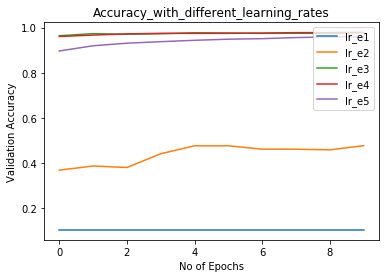

In [76]:
pylab.plot(lr1['epoch'],lr1['val_acc'],label = 'lr_e1')
pylab.plot(lr2['epoch'], lr2['val_acc'],label = 'lr_e2')
pylab.plot(lr3['epoch'],lr3['val_acc'],label = 'lr_e3')
pylab.plot(lr4['epoch'], lr4['val_acc'],label = 'lr_e4')
pylab.plot(lr5['epoch'],lr5['val_acc'],label = 'lr_e5')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("No of Epochs")
pylab.ylabel("Validation Accuracy")
plt.title('Accuracy_with_different_learning_rates')
pylab.savefig("Accuracy_with_different_learning_rates")
pylab.show()

In [77]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_relu.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_relu.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 634us/step - loss: 0.2049 - acc: 0.9406 - val_loss: 0.1099 - val_acc: 0.9664
Epoch 2/10
48000/48000 [==============================] - 30s 632us/step - loss: 0.0787 - acc: 0.9754 - val_loss: 0.1107 - val_acc: 0.9666
Epoch 3/10
48000/48000 [==============================] - 29s 612us/step - loss: 0.0538 - acc: 0.9831 - val_loss: 0.0904 - val_acc: 0.9738
Epoch 4/10
48000/48000 [==============================] - 29s 603us/step - loss: 0.0431 - acc: 0.9861 - val_loss: 0.0932 - val_acc: 0.9766
Epoch 5/10
48000/48000 [==============================] - 29s 604us/step - loss: 0.0328 - acc: 0.9886 - val_loss: 0.0890 - val_acc: 0.9760
Epoch 6/10
48000/48000 [==============================] - 29s 609us/step - loss: 0.0269 - acc: 0.9911 - val_loss: 0.1103 - val_acc: 0.9756
Epoch 7/10
48000/48000 [==============================] - 29s 608us/step - loss: 0.0264 - acc: 0.9918 - val_loss: 0.

In [78]:
model1 =  model_constructor(1,[784],"tanh")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_tanh.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_tanh.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 619us/step - loss: 0.2467 - acc: 0.9300 - val_loss: 0.1446 - val_acc: 0.9573
Epoch 2/10
48000/48000 [==============================] - 30s 615us/step - loss: 0.1070 - acc: 0.9670 - val_loss: 0.1159 - val_acc: 0.9648
Epoch 3/10
48000/48000 [==============================] - 30s 618us/step - loss: 0.0792 - acc: 0.9753 - val_loss: 0.1138 - val_acc: 0.9659
Epoch 4/10
48000/48000 [==============================] - 30s 615us/step - loss: 0.0667 - acc: 0.9793 - val_loss: 0.1352 - val_acc: 0.9577
Epoch 5/10
48000/48000 [==============================] - 29s 612us/step - loss: 0.0565 - acc: 0.9817 - val_loss: 0.1176 - val_acc: 0.9619
Epoch 6/10
48000/48000 [==============================] - 30s 617us/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.1123 - val_acc: 0.9685
Epoch 7/10
48000/48000 [==============================] - 29s 609us/step - loss: 0.0452 - acc: 0.9849 - val_loss: 0.

In [79]:
model1 =  model_constructor(1,[784],"sigmoid")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_sigmoid.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_sigmoid.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 611us/step - loss: 0.2005 - acc: 0.9396 - val_loss: 0.1169 - val_acc: 0.9648
Epoch 2/10
48000/48000 [==============================] - 29s 600us/step - loss: 0.0795 - acc: 0.9761 - val_loss: 0.0892 - val_acc: 0.9722
Epoch 3/10
48000/48000 [==============================] - 29s 602us/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0828 - val_acc: 0.9749
Epoch 4/10
48000/48000 [==============================] - 29s 598us/step - loss: 0.0334 - acc: 0.9902 - val_loss: 0.0781 - val_acc: 0.9759
Epoch 5/10
48000/48000 [==============================] - 29s 602us/step - loss: 0.0234 - acc: 0.9935 - val_loss: 0.0789 - val_acc: 0.9778
Epoch 6/10
48000/48000 [==============================] - 29s 600us/step - loss: 0.0181 - acc: 0.9946 - val_loss: 0.0763 - val_acc: 0.9781
Epoch 7/10
48000/48000 [==============================] - 29s 597us/step - loss: 0.0140 - acc: 0.9958 - val_loss: 0.

In [80]:
relu = pd.read_csv('MNIST_model_relu.csv')
relu

,epoch,acc,loss,val_acc,val_loss
0,0,0.940583,0.204931,0.966417,0.109950
1,1,0.975396,0.078709,0.966583,0.110732
2,2,0.983062,0.053792,0.973750,0.090357
3,3,0.986062,0.043078,0.976583,0.093187
4,4,0.988646,0.032816,0.976000,0.089001
5,5,0.991125,0.026938,0.975583,0.110287
6,6,0.991833,0.026384,0.974500,0.112603
7,7,0.993167,0.020848,0.975583,0.119172
8,8,0.992687,0.021705,0.973750,0.120096
9,9,0.993938,0.018126,0.977417,0.112478


In [82]:
tanh = pd.read_csv('MNIST_model_tanh.csv')
tanh

,epoch,acc,loss,val_acc,val_loss
0,0,0.930042,0.246695,0.957250,0.144560
1,1,0.967000,0.107009,0.964833,0.115922
2,2,0.975271,0.079208,0.965917,0.113836
3,3,0.979292,0.066741,0.957667,0.135173
4,4,0.981688,0.056501,0.961917,0.117592
5,5,0.984604,0.048176,0.968500,0.112318
6,6,0.984917,0.045211,0.973083,0.092315
7,7,0.987125,0.041149,0.965000,0.125957
8,8,0.986854,0.038502,0.971250,0.110700
9,9,0.988125,0.035729,0.972500,0.100091


In [81]:
sigmoid = pd.read_csv('MNIST_model_sigmoid.csv')
sigmoid

,epoch,acc,loss,val_acc,val_loss
0,0,0.939625,0.200455,0.964833,0.116912
1,1,0.976063,0.079504,0.972250,0.089238
2,2,0.984542,0.050641,0.974917,0.082825
3,3,0.990187,0.033411,0.975917,0.078130
4,4,0.993542,0.023358,0.977750,0.078923
5,5,0.994625,0.018081,0.978083,0.076291
6,6,0.995750,0.013967,0.977750,0.079124
7,7,0.996667,0.011863,0.978500,0.078918
8,8,0.997437,0.009600,0.973667,0.097963
9,9,0.998021,0.007943,0.980000,0.079941


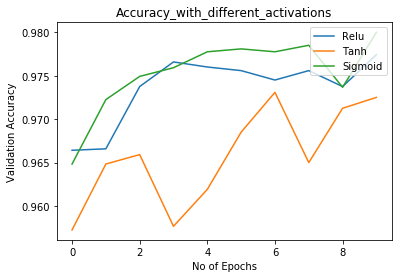

In [83]:
pylab.plot(relu['epoch'],relu['val_acc'],label = 'Relu')
pylab.plot(tanh['epoch'], tanh['val_acc'],label = 'Tanh')
pylab.plot(sigmoid['epoch'],sigmoid['val_acc'],label = 'Sigmoid')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("No of Epochs")
pylab.ylabel("Validation Accuracy")
plt.title('Accuracy_with_different_activations')
pylab.savefig("Accuracy_with_different_activations")
pylab.show()

In [84]:
model1 =  model_constructor(1,[512],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_512_single_hidden.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 408us/step - loss: 0.1945 - acc: 0.9416 - val_loss: 0.1095 - val_acc: 0.9674
Epoch 2/10
48000/48000 [==============================] - 20s 409us/step - loss: 0.0803 - acc: 0.9746 - val_loss: 0.1038 - val_acc: 0.9700
Epoch 3/10
48000/48000 [==============================] - 20s 409us/step - loss: 0.0580 - acc: 0.9813 - val_loss: 0.1011 - val_acc: 0.9741
Epoch 4/10
48000/48000 [==============================] - 20s 413us/step - loss: 0.0410 - acc: 0.9866 - val_loss: 0.0900 - val_acc: 0.9743
Epoch 5/10
48000/48000 [==============================] - 19s 398us/step - loss: 0.0338 - acc: 0.9893 - val_loss: 0.1088 - val_acc: 0.9732
Epoch 6/10
48000/48000 [==============================] - 19s 400us/step - loss: 0.0286 - acc: 0.9903 - val_loss: 0.1164 - val_acc: 0.9717
Epoch 7/10
48000/48000 [==============================] - 19s 405us/step - loss: 0.0233 - acc: 0.9923 - val_loss: 0.

In [85]:
model1 =  model_constructor(1,[1024],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_1024_single_hidden.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_1024_single_hidden.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 38s 801us/step - loss: 0.2359 - acc: 0.9400 - val_loss: 0.1071 - val_acc: 0.9666
Epoch 2/10
48000/48000 [==============================] - 38s 797us/step - loss: 0.0786 - acc: 0.9757 - val_loss: 0.0901 - val_acc: 0.9734
Epoch 3/10
48000/48000 [==============================] - 39s 808us/step - loss: 0.0550 - acc: 0.9827 - val_loss: 0.0958 - val_acc: 0.9724
Epoch 4/10
48000/48000 [==============================] - 37s 768us/step - loss: 0.0427 - acc: 0.9863 - val_loss: 0.0973 - val_acc: 0.9738
Epoch 5/10
48000/48000 [==============================] - 37s 769us/step - loss: 0.0324 - acc: 0.9892 - val_loss: 0.0851 - val_acc: 0.9778
Epoch 6/10
48000/48000 [==============================] - 37s 770us/step - loss: 0.0290 - acc: 0.9906 - val_loss: 0.1132 - val_acc: 0.9735
Epoch 7/10
48000/48000 [==============================] - 37s 768us/step - loss: 0.0266 - acc: 0.9910 - val_loss: 0.

In [86]:
single_512 = pd.read_csv('MNIST_model_512_single_hidden.csv')
single_512

,epoch,acc,loss,val_acc,val_loss
0,0,0.941625,0.194477,0.967417,0.109500
1,1,0.974604,0.080304,0.970000,0.103840
2,2,0.981271,0.057959,0.974083,0.101073
3,3,0.986646,0.041005,0.974333,0.090023
4,4,0.989313,0.033792,0.973167,0.108778
5,5,0.990313,0.028581,0.971667,0.116429
6,6,0.992313,0.023263,0.970750,0.110618
7,7,0.992437,0.022720,0.976083,0.103446
8,8,0.993208,0.019941,0.975750,0.116713
9,9,0.994417,0.016217,0.976833,0.122422


In [87]:
single_1024 = pd.read_csv('MNIST_model_1024_single_hidden.csv')
single_1024

,epoch,acc,loss,val_acc,val_loss
0,0,0.940000,0.235887,0.966583,0.107143
1,1,0.975688,0.078625,0.973417,0.090089
2,2,0.982729,0.055027,0.972417,0.095797
3,3,0.986333,0.042730,0.973750,0.097349
4,4,0.989167,0.032380,0.977833,0.085050
5,5,0.990563,0.028958,0.973500,0.113171
6,6,0.991021,0.026624,0.974000,0.112457
7,7,0.994271,0.018655,0.974417,0.120195
8,8,0.993375,0.021817,0.978083,0.103852
9,9,0.995000,0.017266,0.974333,0.129814


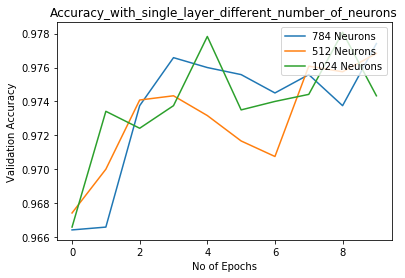

In [89]:
pylab.plot(relu['epoch'],relu['val_acc'],label = '784 Neurons')
pylab.plot(single_512['epoch'], single_512['val_acc'],label = '512 Neurons')
pylab.plot(single_1024['epoch'],single_1024['val_acc'],label = '1024 Neurons')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("No of Epochs")
pylab.ylabel("Validation Accuracy")
plt.title('Accuracy_with_single_layer_different_number_of_neurons')
pylab.savefig("Accuracy_with_single_layer_different_number_of_neurons")
pylab.show()

In [90]:
model1 =  model_constructor(2,[784,784],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_784_two_hidden.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_784_two_hidden.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 56s 1ms/step - loss: 0.2420 - acc: 0.9346 - val_loss: 0.1196 - val_acc: 0.9664
Epoch 2/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0937 - acc: 0.9708 - val_loss: 0.1215 - val_acc: 0.9647
Epoch 3/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0701 - acc: 0.9774 - val_loss: 0.1132 - val_acc: 0.9702
Epoch 4/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0532 - acc: 0.9834 - val_loss: 0.1186 - val_acc: 0.9699
Epoch 5/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0463 - acc: 0.9852 - val_loss: 0.1364 - val_acc: 0.9653
Epoch 6/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0409 - acc: 0.9872 - val_loss: 0.1193 - val_acc: 0.9727
Epoch 7/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0350 - acc: 0.9888 - val_loss: 0.1252 - val_acc

In [91]:
model1 =  model_constructor(3,[784,784,784],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_784_three_hidden.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_784_three_hidden.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2514 - acc: 0.9296 - val_loss: 0.1354 - val_acc: 0.9602
Epoch 2/10
48000/48000 [==============================] - 81s 2ms/step - loss: 0.1020 - acc: 0.9691 - val_loss: 0.1644 - val_acc: 0.9546
Epoch 3/10
48000/48000 [==============================] - 97s 2ms/step - loss: 0.0756 - acc: 0.9770 - val_loss: 0.1288 - val_acc: 0.9643
Epoch 4/10
48000/48000 [==============================] - 97s 2ms/step - loss: 0.0635 - acc: 0.9808 - val_loss: 0.1269 - val_acc: 0.9643
Epoch 5/10
48000/48000 [==============================] - 109s 2ms/step - loss: 0.0558 - acc: 0.9838 - val_loss: 0.1359 - val_acc: 0.9671
Epoch 6/10
48000/48000 [==============================] - 108s 2ms/step - loss: 0.0502 - acc: 0.9845 - val_loss: 0.1258 - val_acc: 0.9704
Epoch 7/10
48000/48000 [==============================] - 109s 2ms/step - loss: 0.0462 - acc: 0.9866 - val_loss: 0.1226 - val_

In [92]:
model1 =  model_constructor(4,[784,784,784,784],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_784_four_hidden.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_784_four_hidden.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 139s 3ms/step - loss: 0.2806 - acc: 0.9203 - val_loss: 0.1500 - val_acc: 0.9572
Epoch 2/10
48000/48000 [==============================] - 139s 3ms/step - loss: 0.1200 - acc: 0.9653 - val_loss: 0.1368 - val_acc: 0.9607
Epoch 3/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.0924 - acc: 0.9742 - val_loss: 0.1064 - val_acc: 0.9709
Epoch 4/10
48000/48000 [==============================] - 148s 3ms/step - loss: 0.0771 - acc: 0.9775 - val_loss: 0.1232 - val_acc: 0.9647
Epoch 5/10
48000/48000 [==============================] - 134s 3ms/step - loss: 0.0649 - acc: 0.9821 - val_loss: 0.1199 - val_acc: 0.9694
Epoch 6/10
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0598 - acc: 0.9831 - val_loss: 0.1213 - val_acc: 0.9712
Epoch 7/10
48000/48000 [==============================] - 108s 2ms/step - loss: 0.0560 - acc: 0.9840 - val_loss: 0.1203 - 

In [93]:
model1 =  model_constructor(5,[784,784,784,784,784],"relu")
model1.compile(optimizer=Adam3, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_784_five_hidden.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_784_five_hidden.hdf5', monitor = 'val_loss',
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train,
                      batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 129s 3ms/step - loss: 0.3169 - acc: 0.9134 - val_loss: 0.1545 - val_acc: 0.9597
Epoch 2/10
48000/48000 [==============================] - 124s 3ms/step - loss: 0.1267 - acc: 0.9646 - val_loss: 0.1304 - val_acc: 0.9668
Epoch 3/10
48000/48000 [==============================] - 130s 3ms/step - loss: 0.1010 - acc: 0.9724 - val_loss: 0.1218 - val_acc: 0.9680
Epoch 4/10
48000/48000 [==============================] - 131s 3ms/step - loss: 0.0796 - acc: 0.9771 - val_loss: 0.1221 - val_acc: 0.9708
Epoch 5/10
48000/48000 [==============================] - 133s 3ms/step - loss: 0.0737 - acc: 0.9796 - val_loss: 0.0986 - val_acc: 0.9740
Epoch 6/10
48000/48000 [==============================] - 129s 3ms/step - loss: 0.0659 - acc: 0.9810 - val_loss: 0.1321 - val_acc: 0.9691
Epoch 7/10
48000/48000 [==============================] - 129s 3ms/step - loss: 0.0572 - acc: 0.9843 - val_loss: 0.1216 - 

In [94]:
two_hidden = pd.read_csv('MNIST_model_784_two_hidden.csv')
two_hidden

,epoch,acc,loss,val_acc,val_loss
0,0,0.934604,0.241986,0.966417,0.119594
1,1,0.970812,0.093653,0.964667,0.121489
2,2,0.977417,0.070119,0.970167,0.113186
3,3,0.983417,0.053230,0.969917,0.118565
4,4,0.985229,0.046317,0.965250,0.136375
5,5,0.987187,0.040907,0.972667,0.119285
6,6,0.988750,0.034986,0.972500,0.125180
7,7,0.989875,0.032017,0.971750,0.136288
8,8,0.991125,0.028615,0.969250,0.163972
9,9,0.992104,0.027299,0.969000,0.163994


In [95]:
three_hidden = pd.read_csv('MNIST_model_784_three_hidden.csv')
three_hidden

,epoch,acc,loss,val_acc,val_loss
0,0,0.929562,0.251412,0.960167,0.135368
1,1,0.969083,0.101968,0.954583,0.164417
2,2,0.976958,0.075641,0.964333,0.128849
3,3,0.980771,0.063493,0.964333,0.126876
4,4,0.983833,0.055776,0.967083,0.135896
5,5,0.984542,0.050218,0.970417,0.125835
6,6,0.986625,0.046223,0.969833,0.122558
7,7,0.988708,0.038553,0.971083,0.126865
8,8,0.988917,0.037989,0.971833,0.136632
9,9,0.989750,0.035402,0.972250,0.155197


In [96]:
four_hidden = pd.read_csv('MNIST_model_784_four_hidden.csv')
four_hidden

,epoch,acc,loss,val_acc,val_loss
0,0,0.920292,0.280593,0.957167,0.150010
1,1,0.965271,0.120020,0.960667,0.136810
2,2,0.974187,0.092407,0.970917,0.106373
3,3,0.977458,0.077074,0.964667,0.123156
4,4,0.982146,0.064884,0.969417,0.119893
5,5,0.983083,0.059792,0.971250,0.121262
6,6,0.983979,0.056015,0.970000,0.120315
7,7,0.986896,0.044586,0.967833,0.151285
8,8,0.986542,0.048173,0.972500,0.146003
9,9,0.988688,0.041336,0.976667,0.111695


In [97]:
five_hidden = pd.read_csv('MNIST_model_784_five_hidden.csv')
five_hidden

,epoch,acc,loss,val_acc,val_loss
0,0,0.913375,0.316909,0.959750,0.154461
1,1,0.964604,0.126726,0.966833,0.130429
2,2,0.972375,0.100989,0.968000,0.121767
3,3,0.977062,0.079627,0.970833,0.122110
4,4,0.979604,0.073651,0.974000,0.098590
5,5,0.981000,0.065853,0.969083,0.132119
6,6,0.984292,0.057193,0.971750,0.121645
7,7,0.985396,0.054669,0.974500,0.114486
8,8,0.985750,0.050733,0.972417,0.118695
9,9,0.987313,0.045057,0.969750,0.130807


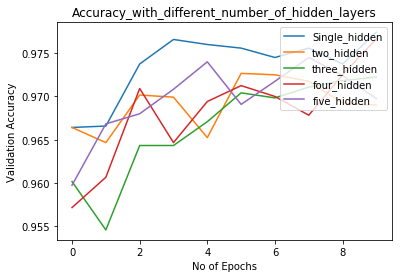

In [98]:
pylab.plot(relu['epoch'],relu['val_acc'],label = 'Single_hidden')
pylab.plot(two_hidden['epoch'], two_hidden['val_acc'],label = 'two_hidden')
pylab.plot(three_hidden['epoch'],three_hidden['val_acc'],label = 'three_hidden')
pylab.plot(four_hidden['epoch'], four_hidden['val_acc'],label = 'four_hidden')
pylab.plot(five_hidden['epoch'],five_hidden['val_acc'],label = 'five_hidden')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("No of Epochs")
pylab.ylabel("Validation Accuracy")
plt.title('Accuracy_with_different_number_of_hidden_layers')
pylab.savefig("Accuracy_with_different_number_of_hidden_layers")
pylab.show()

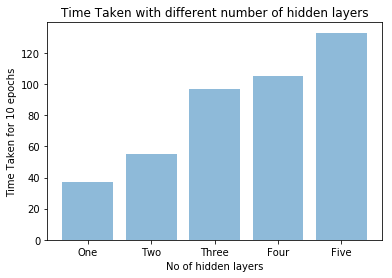

In [100]:
layers = ('One', 'Two', 'Three', 'Four', 'Five')
y_pos = np.arange(len(layers))
time = [37, 55, 97, 105, 133]
plt.bar(y_pos, time, align='center', alpha=0.5)
plt.xticks(y_pos, layers)
plt.ylabel('Time Taken for 1 epochs in seconds')
plt.xlabel('No of hidden layers')
plt.title('Time Taken with different number of hidden layers')
pylab.savefig("Time_with_different_number_of_hidden_layers")
pylab.show()

In [101]:
Adam = optimizers.Adam(lr = 0.001)
SGD = optimizers.SGD(lr = 0.001)
Adadelta = optimizers.Adadelta(lr = 0.001)
Adagrad = optimizers.Adagrad(lr = 0.001)
RMSprop = optimizers.RMSprop(lr = 0.001)

In [102]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adam.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adam.hdf5', monitor = 'val_loss', 
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 626us/step - loss: 0.2001 - acc: 0.9382 - val_loss: 0.1247 - val_acc: 0.9626
Epoch 2/10
48000/48000 [==============================] - 29s 605us/step - loss: 0.0900 - acc: 0.9722 - val_loss: 0.1127 - val_acc: 0.9650
Epoch 3/10
48000/48000 [==============================] - 29s 612us/step - loss: 0.0640 - acc: 0.9797 - val_loss: 0.1076 - val_acc: 0.9701
Epoch 4/10
48000/48000 [==============================] - 29s 603us/step - loss: 0.0488 - acc: 0.9841 - val_loss: 0.1096 - val_acc: 0.9713
Epoch 5/10
48000/48000 [==============================] - 30s 616us/step - loss: 0.0414 - acc: 0.9864 - val_loss: 0.1377 - val_acc: 0.9676
Epoch 6/10
48000/48000 [==============================] - 29s 603us/step - loss: 0.0338 - acc: 0.9887 - val_loss: 0.1006 - val_acc: 0.9750
Epoch 7/10
48000/48000 [==============================] - 29s 599us/step - loss: 0.0298 - acc: 0.9905 - val_loss: 0.

In [103]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=RMSprop, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_Rmsprop.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_Rmsprop.hdf5', monitor = 'val_loss', 
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 509us/step - loss: 0.2284 - acc: 0.9350 - val_loss: 0.1406 - val_acc: 0.9642
Epoch 2/10
48000/48000 [==============================] - 24s 499us/step - loss: 0.1126 - acc: 0.9704 - val_loss: 0.1314 - val_acc: 0.9717
Epoch 3/10
48000/48000 [==============================] - 24s 493us/step - loss: 0.0827 - acc: 0.9797 - val_loss: 0.1725 - val_acc: 0.9642
Epoch 4/10
48000/48000 [==============================] - 21s 430us/step - loss: 0.0672 - acc: 0.9839 - val_loss: 0.1840 - val_acc: 0.9673
Epoch 5/10
48000/48000 [==============================] - 21s 434us/step - loss: 0.0588 - acc: 0.9862 - val_loss: 0.1619 - val_acc: 0.9728
Epoch 6/10
48000/48000 [==============================] - 20s 424us/step - loss: 0.0505 - acc: 0.9890 - val_loss: 0.1551 - val_acc: 0.9750
Epoch 7/10
48000/48000 [==============================] - 21s 438us/step - loss: 0.0400 - acc: 0.9910 - val_loss: 0.

In [104]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=SGD, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_SGD.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_SGD.hdf5', monitor = 'val_loss', 
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 318us/step - loss: 0.7785 - acc: 0.7844 - val_loss: 0.4311 - val_acc: 0.8862
Epoch 2/10
48000/48000 [==============================] - 14s 294us/step - loss: 0.4022 - acc: 0.8896 - val_loss: 0.3403 - val_acc: 0.9068
Epoch 3/10
48000/48000 [==============================] - 14s 295us/step - loss: 0.3380 - acc: 0.9054 - val_loss: 0.3019 - val_acc: 0.9157
Epoch 4/10
48000/48000 [==============================] - 15s 304us/step - loss: 0.3038 - acc: 0.9144 - val_loss: 0.2778 - val_acc: 0.9220
Epoch 5/10
48000/48000 [==============================] - 15s 312us/step - loss: 0.2807 - acc: 0.9208 - val_loss: 0.2604 - val_acc: 0.9266
Epoch 6/10
48000/48000 [==============================] - 18s 368us/step - loss: 0.2628 - acc: 0.9261 - val_loss: 0.2478 - val_acc: 0.9303
Epoch 7/10
48000/48000 [==============================] - 18s 375us/step - loss: 0.2487 - acc: 0.9301 - val_loss: 0.

In [105]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adagrad, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adagrad.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adagrad.hdf5', monitor = 'val_loss', 
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 412us/step - loss: 0.3037 - acc: 0.9126 - val_loss: 0.2134 - val_acc: 0.9409
Epoch 2/10
48000/48000 [==============================] - 19s 392us/step - loss: 0.1998 - acc: 0.9440 - val_loss: 0.1839 - val_acc: 0.9503
Epoch 3/10
48000/48000 [==============================] - 19s 394us/step - loss: 0.1726 - acc: 0.9526 - val_loss: 0.1680 - val_acc: 0.9552
Epoch 4/10
48000/48000 [==============================] - 19s 395us/step - loss: 0.1560 - acc: 0.9573 - val_loss: 0.1579 - val_acc: 0.9577
Epoch 5/10
48000/48000 [==============================] - 20s 414us/step - loss: 0.1440 - acc: 0.9613 - val_loss: 0.1508 - val_acc: 0.9597
Epoch 6/10
48000/48000 [==============================] - 20s 418us/step - loss: 0.1345 - acc: 0.9637 - val_loss: 0.1452 - val_acc: 0.9603
Epoch 7/10
48000/48000 [==============================] - 23s 480us/step - loss: 0.1272 - acc: 0.9665 - val_loss: 0.

In [106]:
model1 =  model_constructor(1,[784],"relu")
model1.compile(optimizer=Adadelta, loss = 'categorical_crossentropy', metrics = ['accuracy'])
csv_logger1 = CSVLogger('MNIST_model_adadelta.csv')
model_checkpoint1 = ModelCheckpoint('MNIST_model_adadelta.hdf5', monitor = 'val_loss', 
                                    verbose = 1, save_best_only = True)
history1 = model1.fit(x_train_normalised, y_train, batch_size = 32, epochs = 10, 
                    validation_data=(x_validation_normalised, y_validation), 
                      callbacks = [csv_logger1, model_checkpoint1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 34s 717us/step - loss: 2.6428 - acc: 0.1212 - val_loss: 2.3231 - val_acc: 0.1681
Epoch 2/10
48000/48000 [==============================] - 29s 611us/step - loss: 2.0968 - acc: 0.2548 - val_loss: 1.8789 - val_acc: 0.3674
Epoch 3/10
48000/48000 [==============================] - 29s 612us/step - loss: 1.7248 - acc: 0.4493 - val_loss: 1.5591 - val_acc: 0.5270
Epoch 4/10
48000/48000 [==============================] - 29s 614us/step - loss: 1.4550 - acc: 0.5743 - val_loss: 1.3220 - val_acc: 0.6283
Epoch 5/10
48000/48000 [==============================] - 31s 643us/step - loss: 1.2539 - acc: 0.6550 - val_loss: 1.1431 - val_acc: 0.6980
Epoch 6/10
48000/48000 [==============================] - 31s 638us/step - loss: 1.1021 - acc: 0.7073 - val_loss: 1.0069 - val_acc: 0.7456
Epoch 7/10
48000/48000 [==============================] - 30s 622us/step - loss: 0.9853 - acc: 0.7461 - val_loss: 0.

In [107]:
Adam = pd.read_csv('MNIST_model_adam.csv')
Adam

,epoch,acc,loss,val_acc,val_loss
0,0,0.938187,0.200116,0.962583,0.124739
1,1,0.972187,0.090002,0.965000,0.112706
2,2,0.979667,0.064009,0.970083,0.107611
3,3,0.984146,0.048813,0.971333,0.109583
4,4,0.986417,0.041440,0.967583,0.137713
5,5,0.988667,0.033759,0.975000,0.100576
6,6,0.990458,0.029821,0.974167,0.118522
7,7,0.991021,0.027470,0.974167,0.123803
8,8,0.992167,0.026651,0.974250,0.137828
9,9,0.992542,0.022605,0.976417,0.122481


In [108]:
SGD = pd.read_csv('MNIST_model_SGD.csv')
SGD

,epoch,acc,loss,val_acc,val_loss
0,0,0.784417,0.778466,0.886250,0.431130
1,1,0.889604,0.402219,0.906833,0.340250
2,2,0.905375,0.338038,0.915750,0.301912
3,3,0.914375,0.303761,0.922000,0.277808
4,4,0.920792,0.280659,0.926583,0.260443
5,5,0.926083,0.262849,0.930250,0.247818
6,6,0.930125,0.248704,0.933917,0.236182
7,7,0.934396,0.236745,0.936333,0.226696
8,8,0.937250,0.226162,0.939833,0.218331
9,9,0.939979,0.217146,0.941417,0.211071


In [109]:
Adagrad = pd.read_csv('MNIST_model_adagrad.csv')
Adagrad

,epoch,acc,loss,val_acc,val_loss
0,0,0.912625,0.303688,0.940917,0.213397
1,1,0.944042,0.199812,0.950250,0.183886
2,2,0.952562,0.172639,0.955167,0.168034
3,3,0.957333,0.156032,0.957667,0.157864
4,4,0.961271,0.143989,0.959667,0.150807
5,5,0.963688,0.134542,0.960333,0.145187
6,6,0.966521,0.127193,0.961083,0.141026
7,7,0.968125,0.120843,0.962250,0.136455
8,8,0.969938,0.115433,0.962417,0.132890
9,9,0.971333,0.110660,0.963333,0.129778


In [110]:
Adadelta = pd.read_csv('MNIST_model_adadelta.csv')
Adadelta

,epoch,acc,loss,val_acc,val_loss
0,0,0.121250,2.642752,0.168083,2.323056
1,1,0.254812,2.096819,0.367417,1.878925
2,2,0.449292,1.724844,0.527000,1.559106
3,3,0.574292,1.455025,0.628333,1.322001
4,4,0.655021,1.253938,0.698000,1.143129
5,5,0.707292,1.102131,0.745583,1.006924
6,6,0.746125,0.985348,0.778250,0.901533
7,7,0.773229,0.894132,0.803583,0.818632
8,8,0.794958,0.821216,0.822000,0.751907
9,9,0.811438,0.762076,0.834667,0.698011


In [111]:
Rmsprop = pd.read_csv('MNIST_model_Rmsprop.csv')
Rmsprop

,epoch,acc,loss,val_acc,val_loss
0,0,0.934979,0.228392,0.964167,0.140576
1,1,0.970417,0.112646,0.971667,0.131429
2,2,0.979708,0.082660,0.964167,0.172543
3,3,0.983917,0.067172,0.967250,0.184029
4,4,0.986167,0.058756,0.972750,0.161871
5,5,0.989000,0.050459,0.975000,0.155064
6,6,0.990958,0.040043,0.974250,0.165188
7,7,0.992396,0.034824,0.978333,0.149469
8,8,0.994208,0.029339,0.978417,0.151526
9,9,0.994479,0.027279,0.980167,0.155848


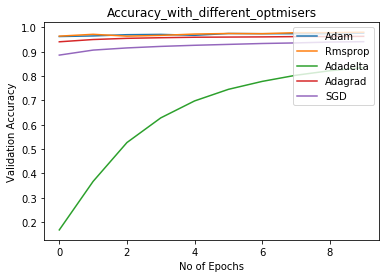

In [112]:
pylab.plot(Adam['epoch'],Adam['val_acc'],label = 'Adam')
pylab.plot(Rmsprop['epoch'], Rmsprop['val_acc'],label = 'Rmsprop')
pylab.plot(Adadelta['epoch'],Adadelta['val_acc'],label = 'Adadelta')
pylab.plot(Adagrad['epoch'], Adagrad['val_acc'],label = 'Adagrad')
pylab.plot(SGD['epoch'],SGD['val_acc'],label = 'SGD')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("No of Epochs")
pylab.ylabel("Validation Accuracy")
plt.title('Accuracy_with_different_optmisers')
pylab.savefig("Accuracy_with_different_optimisers")
pylab.show()

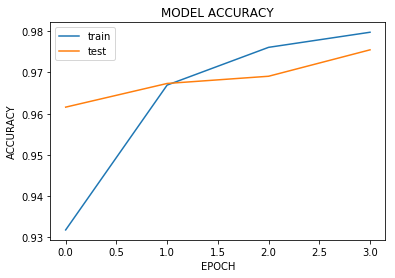

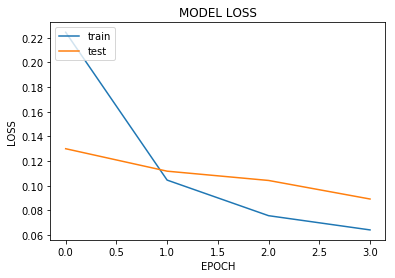

In [42]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MODEL ACCURACY')
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarise history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel("LOSS")
plt.xlabel("EPOCH")
plt.legend(['train','test'], loc='upper left')
plt.show()

In [27]:
score = model.evaluate(x_test_normalised, y_test)

10000/10000 [==============================] - 1s 105us/step


In [28]:
score

[0.10537971118960159, 0.97809999999999997]

In [29]:
predictions = model.predict(x_test_normalised)

In [30]:
predictions.shape

(10000, 10)

In [32]:
def denormalise(image) :
    image = image * (std + 1e-7)
    image = image + mean
    return image

In [31]:
def convert_vector_to_image(vector) :
    image = np.reshape(vector,(28,28))
    return image

In [135]:
score

[0.1226119778562992, 0.96989999999999998]